## Install the repo

In [5]:
%rm -rf Visual-Place-Recognition-Project
!git clone -b adaptive_reranking --single-branch --recursive https://github.com/Digre01/Visual-Place-Recognition-Project.git


Cloning into 'Visual-Place-Recognition-Project'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 175 (delta 34), reused 36 (delta 21), pack-reused 105 (from 1)
Receiving objects: 100% (175/175), 37.31 MiB | 44.79 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Submodule 'image-matching-models' (https://github.com/alexstoken/image-matching-models.git) registered for path 'image-matching-models'
Cloning into '/kaggle/working/Visual-Place-Recognition-Project/image-matching-models'...
remote: Enumerating objects: 2064, done.        
remote: Counting objects: 100% (993/993), done.        
remote: Compressing objects: 100% (423/423), done.        
remote: Total 2064 (delta 708), reused 660 (delta 570), pack-reused 1071 (from 2)        
Receiving objects: 100% (2064/2064), 91.68 MiB | 47.18 MiB/s, done.
Resolving deltas: 100% (1402/1402), done.
Submodule path 'image-matching-models': chec

In [6]:
%cd Visual-Place-Recognition-Project/image-matching-models
!pip install -e .[all]

/kaggle/working/Visual-Place-Recognition-Project/image-matching-models
Obtaining file:///kaggle/working/Visual-Place-Recognition-Project/image-matching-models
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 103.9 MB/s eta 0:00:0000:0100:01


## Download datasets

In [10]:
!python download_datasets.py

Downloading...
From (original): https://drive.google.com/uc?id=15QB3VNKj93027UAQWv7pzFQO1JDCdZj2
From (redirected): https://drive.google.com/uc?id=15QB3VNKj93027UAQWv7pzFQO1JDCdZj2&confirm=t&uuid=4ab74ec3-1418-4010-b32e-e3eb65dc6732
To: /kaggle/working/Visual-Place-Recognition-Project/data/tokyo_xs.zip
100%|████████████████████████████████████████| 141M/141M [00:01<00:00, 98.7MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1tQqEyt3go3vMh4fj_LZrRcahoTbzzH-y
From (redirected): https://drive.google.com/uc?id=1tQqEyt3go3vMh4fj_LZrRcahoTbzzH-y&confirm=t&uuid=7820d91e-196c-4801-b55b-3f6f0bdcf339
To: /kaggle/working/Visual-Place-Recognition-Project/data/sf_xs.zip
100%|██████████████████████████████████████| 1.03G/1.03G [00:10<00:00, 96.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1q7usSe9_5xV5zTfN-1In4DlmF5ReyU_A
From (redirected): https://drive.google.com/uc?id=1q7usSe9_5xV5zTfN-1In4DlmF5ReyU_A&confirm=t&uuid=21c2634f-0a8a-4d9c-9a6e-75f93e479e33


## Pipeline

In [20]:
%rm dataset_cosplace_loftr.csv
%rm dataset_cosplace_superpoint-lg.csv
%rm dataset_netvlad_loftr.csv
%rm dataset_netvlad_superpoint-lg.csv
%rm -rf inliers_full_cosplace_loftr
%rm -rf inliers_full_cosplace_superpoint-lg
%rm -rf inliers_full_netvlad_loftr
%rm -rf inliers_full_netvlad_superpoint-lg

rm: cannot remove 'dataset_netvlad_loftr.csv': No such file or directory


In [21]:
%ls 

adaptive_reranking.py      match_queries_preds.py       trained_models/
data/                      model_cosplace_loftr.joblib  train_logReg.py
download_datasets.py       prepare_logistic_data.py     util.py
image-matching-models/     __pycache__/                 VPR-methods-evaluation/
LICENSE                    README.md                    vpr_uncertainty/
logistic_regression.ipynb  reranking.py
logs/                      start_your_project.ipynb


In [ ]:
import os
import shutil

CONFIGS = [
    {"vpr": "cosplace", "backbone": "ResNet18", "dim": 512, "matcher": "loftr"},
    {"vpr": "cosplace", "backbone": "ResNet18", "dim": 512, "matcher": "superpoint-lg"},
    {"vpr": "netvlad", "backbone": "VGG16", "dim": 4096, "matcher": "loftr"},
    {"vpr": "netvlad", "backbone": "VGG16", "dim": 4096, "matcher": "superpoint-lg"}
]


for conf in CONFIGS:
    v_name = conf["vpr"]
    m_name = conf["matcher"]
    log_tag = f"train_{v_name}"
    
    print(f"\n{'='*60} Running: {v_name.upper()} + {m_name.upper()}\n{'='*60}")
    
    #RETRIVAL
    !python VPR-methods-evaluation/main.py \
        --method={v_name} --backbone={conf['backbone']} --descriptors_dimension={conf['dim']} \
        --num_workers 4 --batch_size 32 \
        --log_dir {log_tag} \
        --image_size 512 512 \
        --database_folder 'data/svox/images/train/gallery' \
        --queries_folder 'data/svox/images/train/queries_sun' \
        --recall_values 1 5 10 20 --num_preds_to_save 20
    

    base_log = f"logs/{log_tag}"
    latest_run = sorted(os.listdir(base_log))[-1]
    preds_dir = os.path.join(base_log, latest_run, "preds")
    print(preds_dir)
    

    #MATCHING
    out_inliers = f"inliers_full_{v_name}_{m_name}"
    !python match_queries_preds.py \
        --preds-dir {preds_dir} \
        --out-dir {out_inliers} \
        --matcher {m_name} \
        --num-preds 20
    
    #TRAINING
    csv_file = f"dataset_{v_name}_{m_name}.csv"
    model_file = f"model_{v_name}_{m_name}.joblib"
    
    !python prepare_logistic_data.py --preds-dir {preds_dir} --inliers-dir {out_inliers} --output-csv {csv_file}
    !python train_logReg.py --csv-path {csv_file} --model-out {model_file}


============================================================\Running: NETVLAD + LOFTR


<>:14: SyntaxWarning: invalid escape sequence '\R'
<>:14: SyntaxWarning: invalid escape sequence '\R'
/tmp/ipykernel_55/1889738901.py:14: SyntaxWarning: invalid escape sequence '\R'
  print(f"\n{'='*60}\Running: {v_name.upper()} + {m_name.upper()}\n{'='*60}")


2026-01-23 12:14:45 VPR-methods-evaluation/main.py --method=netvlad --backbone=VGG16 --descriptors_dimension=4096 --num_workers 4 --batch_size 32 --log_dir train_netvlad --image_size 512 512 --database_folder data/svox/images/train/gallery --queries_folder data/svox/images/train/queries_sun --recall_values 1 5 10 20 --num_preds_to_save 20
2026-01-23 12:14:45 Arguments: Namespace(positive_dist_threshold=25, method='netvlad', backbone='VGG16', descriptors_dimension=4096, faiss_metric='L2', database_folder='data/svox/images/train/gallery', queries_folder='data/svox/images/train/queries_sun', num_workers=4, batch_size=32, log_dir='train_netvlad', device='cuda', recall_values=[1, 5, 10, 20], no_labels=False, num_preds_to_save=20, save_only_wrong_preds=False, image_size=[512, 512], save_descriptors=False, save_for_uncertainty=False, use_labels=True)
2026-01-23 12:14:45 Testing with netvlad with a VGG16 backbone and descriptors dimension 4096
2026-01-23 12:14:45 The outputs are being saved in

## Visualization

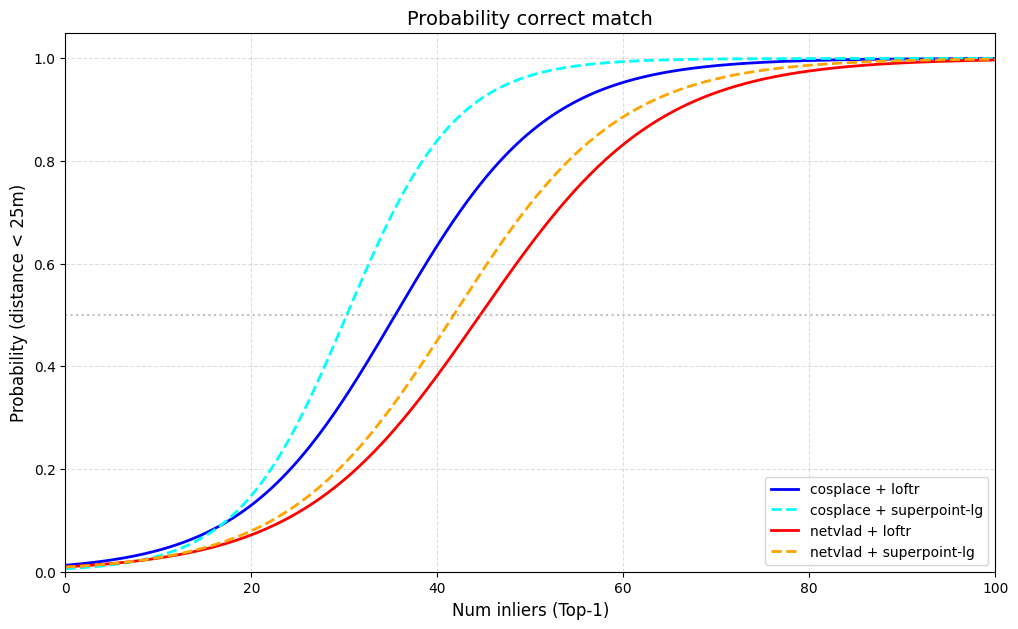

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import glob

CONFIGS = [
    {"vpr": "cosplace", "backbone": "ResNet18", "dim": 512, "matcher": "loftr"},
    {"vpr": "cosplace", "backbone": "ResNet18", "dim": 512, "matcher": "superpoint-lg"},
    {"vpr": "netvlad", "backbone": "VGG16", "dim": 4096, "matcher": "loftr"},
    {"vpr": "netvlad", "backbone": "VGG16", "dim": 4096, "matcher": "superpoint-lg"}
]

plt.figure(figsize=(12, 7))

x_test = np.linspace(0, 100, 500).reshape(-1, 1)

colors = ['blue', 'cyan', 'red', 'orange']
styles = ['-', '--', '-', '--']

for i, conf in enumerate(CONFIGS):
    m_path = f"model_{conf['vpr']}_{conf['matcher']}.joblib"
    if os.path.exists(m_path):
        model = joblib.load(m_path)
        # Calcola la probabilità P(y=1 | x)
        probs = model.predict_proba(x_test)[:, 1]
        
        label = f"{conf['vpr']} + {conf['matcher']}"
        plt.plot(x_test, probs, label=label, color=colors[i], linestyle=styles[i], lw=2)

plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
plt.title("Probability correct match", fontsize=14)
plt.xlabel("Num inliers (Top-1)", fontsize=12)
plt.ylabel("Probability (distance < 25m)", fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.4)
plt.legend(loc='lower right', fontsize=10)
plt.xlim(0, 100) 
plt.ylim(0, 1.05)

plt.savefig("logistic_comparison.png")
plt.show()

## Validation

In [ ]:
#Extract validation dataset CSV

import os
import shutil

CONFIGS = [
  #  {"vpr": "cosplace", "backbone": "ResNet18", "dim": 512, "matcher": "loftr"},  #Matteo 
  #  {vpr": "cosplace", "backbone": "ResNet18", "dim": 512, "matcher": "superpoint-lg"}, #Silvia
  #  {"vpr": "netvlad", "backbone": "VGG16", "dim": 4096, "matcher": "loftr"}, #Lisa
  #  {"vpr": "netvlad", "backbone": "VGG16", "dim": 4096, "matcher": "superpoint-lg"} #Eva
]



for conf in CONFIGS:
    v_name = conf["vpr"]
    m_name = conf["matcher"]
    log_tag = f"train_{v_name}"
    
    print(f"\n{'='*60} Running: {v_name.upper()} + {m_name.upper()}\n{'='*60}")
    
    !python VPR-methods-evaluation/main.py \
        --method={v_name} --backbone={conf['backbone']} --descriptors_dimension={conf['dim']} \
        --num_workers 4 --batch_size 32 \
        --log_dir {log_tag} \
        --image_size 512 512 \
        --database_folder 'data/sf_xs/val/database' \
        --queries_folder 'data/sf_xs/val/queries' \
        --recall_values 1 5 10 20 --num_preds_to_save 20
    

    base_log = f"logs/{log_tag}"
    latest_run = sorted(os.listdir(base_log))[-1]
    preds_dir = os.path.join(base_log, latest_run, "preds")
    print(preds_dir)
    
    out_inliers = f"inliers_full_{v_name}_{m_name}"
    !python match_queries_preds.py \
        --preds-dir {preds_dir} \
        --out-dir {out_inliers} \
        --matcher {m_name} \
        --num-preds 20
    
    csv_file = f"dataset_{v_name}_{m_name}_validation.csv"
    model_file = f"model_{v_name}_{m_name}_validation.joblib"
    
    !python prepare_logistic_data.py --preds-dir {preds_dir} --inliers-dir {out_inliers} --output-csv {csv_file}
    !python train_logReg.py --csv-path {csv_file} --model-out {model_file}


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import precision_score

# Validation parameters
thresholds = np.linspace(0.1, 0.95, 18)
target_precision = 0.95  #Minimum Precision for TOP-1

for conf in CONFIGS:
    v_name, m_name = conf["vpr"], conf["matcher"]
    model_file = f"model_{v_name}_{m_name}.joblib"

    #there is only SF_XS val
    val_csv = f"dataset_val.csv" 
    
    try:
        model = joblib.load(model_file)
        df = pd.read_csv(val_csv)
        
        probs = model.predict_proba(df[['num_inliers']].values)[:, 1]
        
        best_t, max_savings = 0.5, 0.0
        
        for t in thresholds:
            preds = (probs >= t).astype(int)
            precision = precision_score(df['label'], preds, zero_division=0)
            
            if precision >= target_precision:
                #1 match if stopped, 20 matches otherwise
                avg_matches = np.mean([1 if p == 1 else 20 for p in preds])
                savings = (1 - (avg_matches / 20)) * 100
                if savings >= max_savings:
                    max_savings = savings
                    best_t = t
                    
        print(f"{v_name.upper()} + {m_name.upper()} | Selected Threshold: {best_t:.2f} | Validation Savings: {max_savings:.1f}%")
        
    except FileNotFoundError:
        continue

## Testing

In [ ]:
!python match_queries_preds.py \
--preds-dir '/kaggle/working/Visual-Place-Recognition-Project/logs/log_dir/2026-01-22_16-33-29/preds' \
--matcher 'loftr' \
--device 'cuda' \
--num-preds 20 \
#--logistic-prob-threshold VALIDATED THRESHOLD

In [ ]:
!python adaptive_reranking.py  \
    --preds-dir '/kaggle/working/Visual-Place-Recognition-Project/logs/log_dir/2026-01-22_16-33-29/preds' \
    --inliers-dir '/kaggle/working/Visual-Place-Recognition-Project/logs/log_dir/2026-01-22_16-33-29/preds_loftr' \
    --num-preds 20 
